# Natural Computing, assignment 3 - task 1

Group 8 - Guus, Bono, Charlotte

## Libraries

In [1]:
import subprocess
import os
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# Task 1.1

In [2]:
# current directory
print(os.getcwd())

C:\Users\guusv\Documents\GitHub\NaturalComputing-RU\Assignment-ArtificialImmuneSystems\negative-selection


In [3]:
n_value = 10
r_value = 4

In [4]:
# load data 
with open ('english.test') as df:
    english_test = df.read()
    english_test = english_test.splitlines()
with open ('tagalog.test') as df:
    tagalog_test = df.read()
    tagalog_test = tagalog_test.splitlines()
with open ('english.train') as df:
    english_train = df.read()
    english_train = english_train.splitlines()

In [5]:
# java outputs (terminal, subprocess)
def terminal_output (test_file, train_file = "english.train", n=n_value, r=r_value):
    command_java = f"java -jar negsel2.jar -alphabet file://{train_file} -self {train_file} -n {n} -r {r} -c -l < {test_file}"
    stream = subprocess.Popen(command_java, shell=True, stderr=subprocess.STDOUT, stdout=subprocess.PIPE)
    scores_results = [float(line.rstrip().decode('utf-8')) for line in iter(stream.stdout.readline, b'')]
    return scores_results

english_results = terminal_output("english.test")
tagalog_results = terminal_output("tagalog.test")
merged_results = english_results + tagalog_results

In [6]:
sorted_anomaly = np.sort(merged_results)
distinct = np.unique(sorted_anomaly)

In [7]:
def sensitivity (distinct, results):
    sensitivity_distinct = []
    for i in distinct:
        higher_score = [x for x in results if x >= i]
        sensitivity_i = len(higher_score)/len(results)
        sensitivity_distinct.append(sensitivity_i)
    #equivalent for adding threshold where no TPs are detected
    sensitivity_distinct.append(0.0)
    #equivalent for adding threshold where no FNs are detected
    sensitivity_distinct.insert(0,1.0)
    return sensitivity_distinct

def specificity (distinct, results):
    specificity_distinct = []
    for i in distinct:
        higher_score = [x for x in results if x < i]
        specificity_i = len(higher_score)/len(results)
        specificity_distinct.append(1-specificity_i)
    #equivalent for adding threshold where no TNs are detected
    specificity_distinct.append(0.0)
    #equivalent for adding threshold where no FPs are detected
    specificity_distinct.insert(0,1.0)
    return specificity_distinct

sensitivity_auc = sensitivity(distinct, tagalog_results)
specificity_auc = specificity(distinct, english_results)

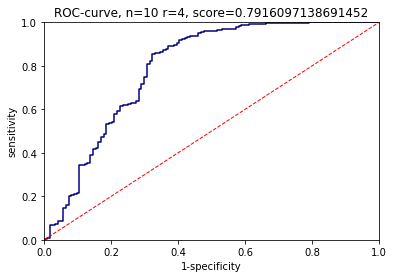

In [8]:
labels = [0]*len(english_test)+[1]*len(tagalog_test)

auc_roc_score = metrics.auc(specificity_auc, sensitivity_auc)
#auc_roc_score = metrics.roc_auc_score(labels, merged_results)

plt.plot(sorted(specificity_auc), sorted(sensitivity_auc),color='navy')
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1-specificity') 
plt.ylabel('sensitivity')
plt.title(f"ROC-curve, n={n_value} r={r_value}, score={auc_roc_score}")

plt.savefig('{}/task1-1_ROC_r{}.png'.format(os.path.join(os.getcwd(),'Task1'), r_value))

plt.show()

# Task 1.2

In [9]:
r_values = [1,3,7,9]

In [15]:
def auc_roc(r_values):
    for i in r_values:
        english_results = terminal_output("english.test", r = i)
        tagalog_results = terminal_output("tagalog.test", r = i)
        merged_results = english_results + tagalog_results
        
        sorted_anomaly = np.sort(merged_results)
        distinct = np.unique(sorted_anomaly)
        
        sensitivity_auc = sensitivity(distinct, tagalog_results)
        specificity_auc = specificity(distinct, english_results)
        
        labels = [0]*len(english_test)+[1]*len(tagalog_test)
        
        auc_roc_score = metrics.auc(specificity_auc, sensitivity_auc)
        #auc_roc_score = metrics.roc_auc_score(labels, merged_results)

        plt.plot(specificity_auc, sensitivity_auc,color='navy')
        plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('1-specificity') 
        plt.ylabel('sensitivity')
        plt.title(f"ROC-curve, n={n_value} r={i}, score={auc_roc_score}")
        
        plt.savefig('{}/task1-2_ROC_r{}.png'.format(os.path.join(os.getcwd(),'Task1'), i))
        
        plt.show()

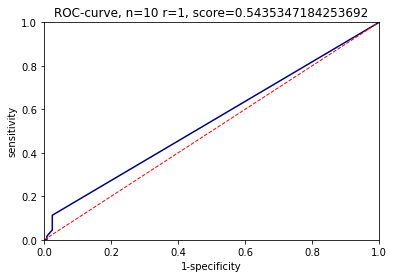

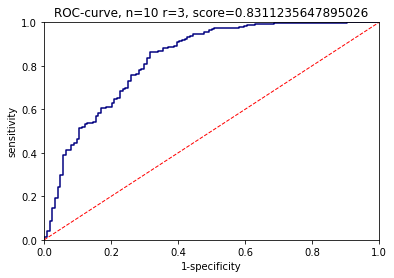

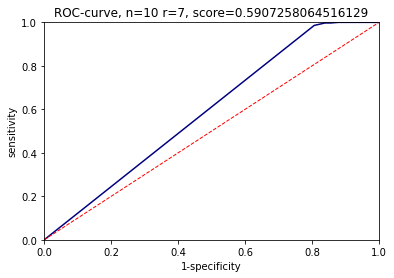

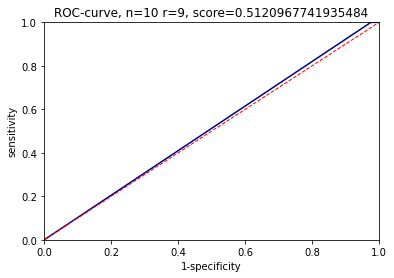

In [16]:
auc_roc(r_values)

# Task 1.3

In [12]:
languages = ["hiligaynon", "middle-english", "plautdietsch", "xhosa"]

In [13]:
def auc_roc_lang(r_values, languages):
    for i in r_values:
        for j in languages: 
            with open (f"lang/{j}.txt") as df:
                language_test = df.read()
                language_test = language_test.splitlines()
    
            english_results = terminal_output("english.test", r = i)
            language_results = terminal_output(f"lang/{j}.txt", r = i)
            merged_results = english_results + language_results

            sorted_anomaly = np.sort(merged_results)
            distinct = np.unique(sorted_anomaly)

            sensitivity_auc = sensitivity(distinct, language_results)
            specificity_auc = specificity(distinct, english_results)
            
            labels = [0]*len(english_test)+[1]*len(language_test)

            auc_roc_score = metrics.auc(specificity_auc, sensitivity_auc)
            #auc_roc_score = metrics.roc_auc_score(labels, merged_results)

            plt.plot(sorted(specificity_auc), sorted(sensitivity_auc),color='navy')
            plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.0])
            plt.xlabel('1-specificity') 
            plt.ylabel('sensitivity')
            plt.title(f"ROC-curve, n={n_value} r={i}, score={auc_roc_score}, language = {j}")

            plt.savefig('{}/task1-3_{}_ROC_r{}.png'.format(os.path.join(os.getcwd(),'Task1'), j, i))
            
            plt.show()

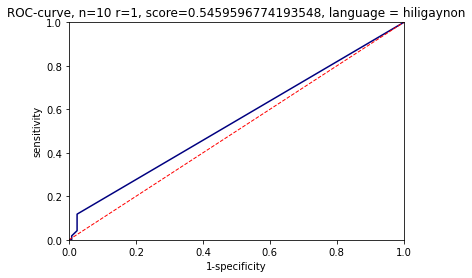

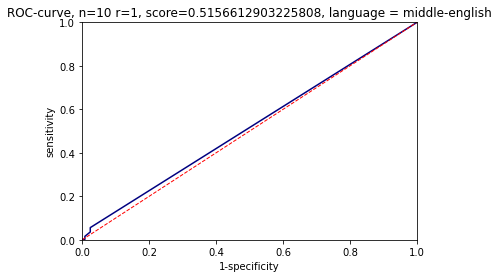

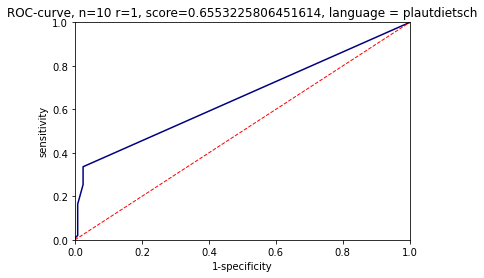

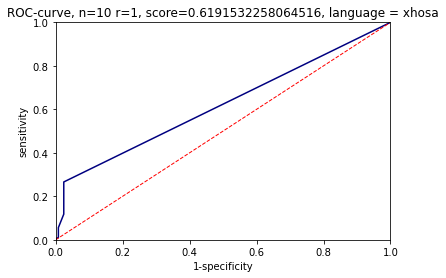

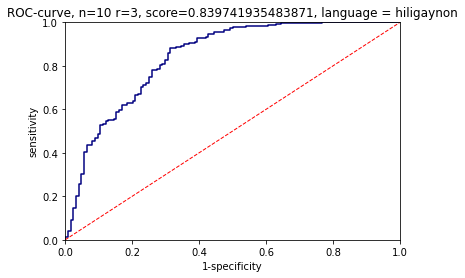

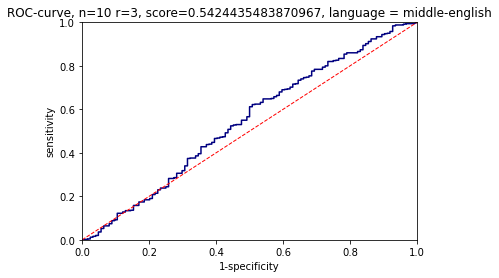

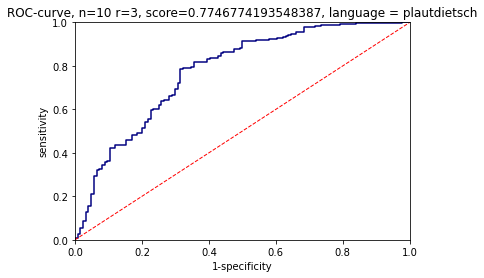

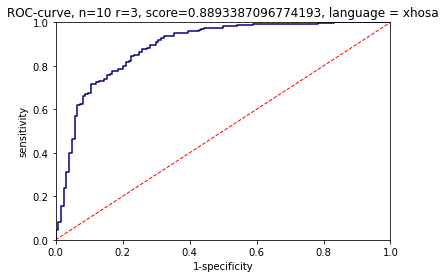

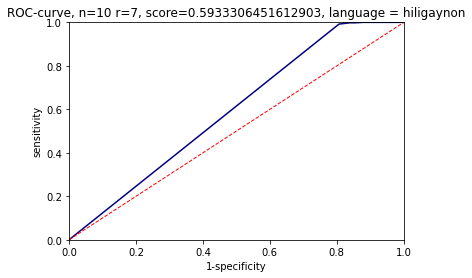

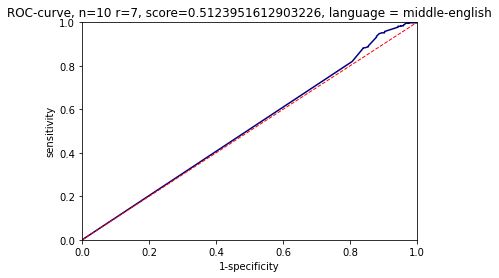

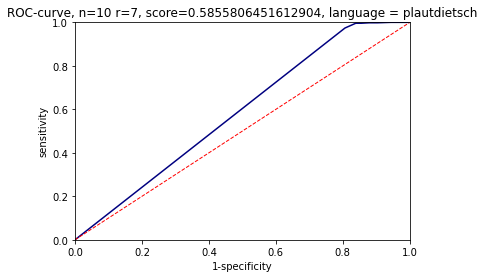

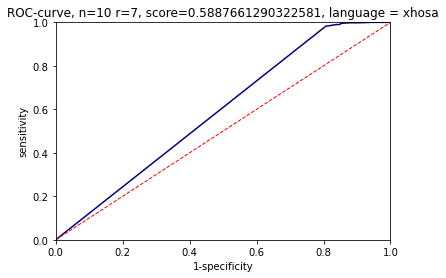

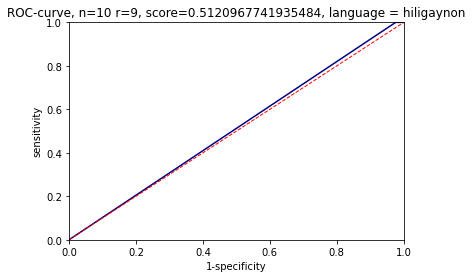

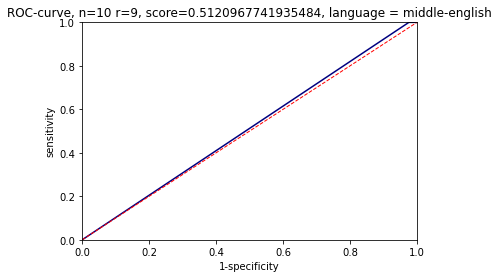

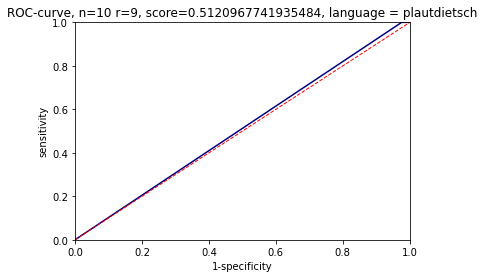

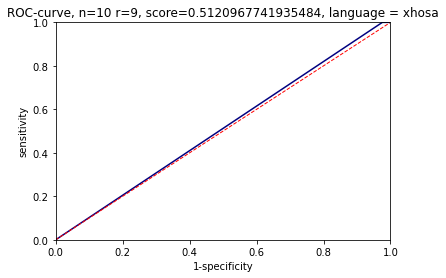

In [14]:
auc_roc_lang(r_values, languages)